# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_original, y_train_original = train['features'], train['labels']
X_valid_original, y_valid_original = valid['features'], valid['labels']
X_test_original, y_test_original = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

**Summary:**

I used the numpy library to calculate summary statistics of the traffic signs data set:

1. The size of training set is 34799
2. The size of the validation set is 4410
3. The size of test set is 12630
4. The shape of a traffic sign image is (32,32,3)
5. The number of unique classes/labels in the data set is 43

All the above information is documented in the code cell below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_original)

# TODO: Number of validation examples
n_validation = len(X_valid_original)

# TODO: Number of testing examples.
n_test = len(X_test_original)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_original[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_original))

assert(len(X_train_original) == len(y_train_original))
assert(len(X_valid_original) == len(y_valid_original))
assert(len(X_test_original) == len(y_test_original))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

**Summary of Visualization of the dataset**

The next couple of code cells below represent some basic visualizations of the dataset.

1. The First code cell randomly displays 10 images from the dataset & its corresponding class value.
2. The second code cell renders a frequency histogram. It shows the label distribution of the training set i.e. represents the number of times different samples occur in the dataset. This sort of tells you how holistic or skewed/biases the training dataset is.

As is visible from the graph below. The dataset is quite small and all the classes are not well represented in the set.

Both outputs are visible below.

In [3]:
# Generic function to plot various images.
import matplotlib.pyplot as plt

def plot_img(row, col, figsize, images, titles, hspace=0.2, wspace=0.1, cmap=None, axes_state='off'):
    fig, axes = plt.subplots(row, col, figsize=figsize)
    fig.subplots_adjust(hspace, wspace)
    axes = axes.ravel()
    for i in range(len(images)):
        image = images[i].squeeze()
        axes[i].axis(axes_state)
        axes[i].imshow(image, cmap)
        if titles is not None and titles[i] is not None:
            axes[i].set_title(titles[i])



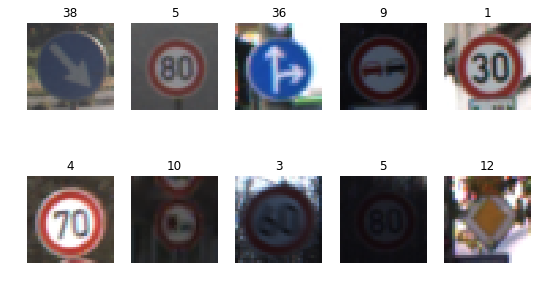

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

display_img = []
display_title = []
for i in range(10):
    index = random.randint(0, n_train)
    image = X_train_original[index]
    title = y_train_original[index]
    display_img.append(image)
    display_title.append(title)

# plotting a random sampling of images from the training set with no preprocessing.
plot_img(2, 5, (10,5), images=display_img, titles=display_title)

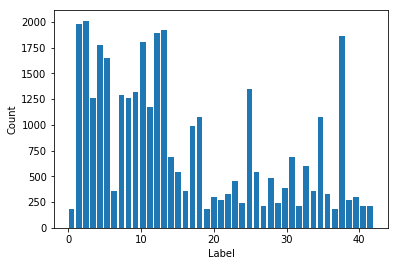

In [5]:
# frequency plot of labels
hist, bins = np.histogram(y_train_original, bins=n_classes)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
# pre-processing helper methods.

import cv2
from skimage import exposure

def grayscale(X_data):
    return np.mean(X_data, axis=3)

def normalize(X_data):
    X_n = np.divide(np.subtract(X_data,128),128)
    return X_n

def histEqualize(X_data):
#     return cv2.equalizeHist(X_data)
    return exposure.equalize_adapthist(X_data)

def reshape(X_data):
    X_data = np.reshape(X_data, [-1, X_data.shape[1], X_data.shape[2], 1])
    return X_data

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
# his = histEqualize(grayscale(X_train_original))
# print(histEqualize(grayscale(X_train_original)))
X_train = normalize(grayscale(X_train_original))
X_valid = normalize(grayscale(X_valid_original))
X_test = normalize(grayscale(X_test_original))
y_train = y_train_original
y_valid = y_valid_original
y_test = y_test_original
print('normalized shape before reshaping', X_train_original.shape)
X_train = reshape(X_train)
X_valid = reshape(X_valid)
X_test = reshape(X_test)
print('normalized shape after reshaping', X_train.shape)
print('mean before', np.mean(X_train_original))
print('mean after', np.mean(X_train))

normalized shape before reshaping (34799, 32, 32, 3)
normalized shape after reshaping (34799, 32, 32, 1)
mean before 82.677589037
mean after -0.354081335648


**Question 1** 
    Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques?

**Answer**
  The code fore steps I have followed are in the code cells above.
  1. Grayscale - I grayscaled the image first since having additional color channels did not add much in terms of accuracy. This was also mentioned in the paper by Pierre Sermanet and Yann LeCun.
  2. Normalization - Next I normalized the grayscaled image. This ensures images are in the range og -1 to 1. I basically wanted to achieve a mean as close to 0 as possible and equal variance. Subtracting 128 and dividing each pixel by 128 is one of the ways to achieve that. This reduces distribution range in the data, making training easier.
  3. Reshaping - Post normalization Reshaping was applied to shape the image in accordance with the original image shape (32X32X3) and a single color channel. Final shape ->  (32 X 32 X 1)
  
  I didn't augment/generate any new data. But I could see that being useful to improve accuracy. More data using rotaed, flipped, shifted images would be useful. Also this could improve the label distribution. I haven't done this for the project..but might try it out later.

In [8]:

### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

**Question 2** 
    Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

**Answer**
* So I basically used the LeNet architecture in the lectures as a base for training my model.
* The network had 2 cnn layers, 2 max pooling and 3 fully connected layers.
* The Final Arcchitecture is as below:

    **Input (32X32X1) -> CNN Layer 1 -> Activation -> Max Pooling -> CNN Layer 2 -> Activation -> Max Pooling -> Flatten output -> Fully Connected Layer -1 -> Activation -> Fully Connected Layer -2 -> Activation -> Fully Connected Layer -3 -> Logits.**
    
  Architecture Config Details:  
    * CNN layers -> Stride size: 1X1,  Filter size: 5,  Padding: Valid
    * Max pooling layers -> Stride size 2X2, Padding: Valid
    * The CNN & Fully Connected layers have weights & biases which are trained as per the code in the cells below.
    * Relu is used an Activation Function.
    * Output dimensions & weights used mentioned in the code cells below.
    * The logit output is further used for prediction and measuring accuracy.
    
The detailed implementation of the architecutre is in the code cells below. 

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 128
KEEP_PROB_TRAIN = 0.65
KEEP_PROB_TEST = 1.0

In [8]:
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def get_convolved_output(x, weights, bias, strides, padding='VALID', activate=True):
    conv = tf.nn.conv2d(x, weights, strides, padding) + bias
    if (activate):
        conv = tf.nn.relu(conv)
    return conv

def get_maxpooled_output(convolved_input, ksize, strides, padding='VALID'):
    maxpooled = tf.nn.max_pool(convolved_input, ksize, strides, padding)
    return maxpooled

def get_fully_connected_output(input, weights, bias, activate=True, dropout=True):
    fc   = tf.matmul(input, weights) + bias
    if (activate):
        fc = tf.nn.relu(fc)
    if (dropout):    
        fc = tf.nn.dropout(fc, keep_prob)
    return fc

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Layer 1 weights & bias.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))

# Layer 2 weights & bias.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))

# Fully Connected Layer 1 weights & bias.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))

# Fully Connected Layer 2 weights & bias.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))    

# Fully Connected Layer 3 weights & bias.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

def LeNet(x):        
    # SOLUTION: Layer 1: Convolutional & Activation. Input = 32x32x1. Output = 28x28x6.
    conv1 = get_convolved_output(x, conv1_W, conv1_b, strides=[1, 1, 1, 1], activate=True)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = get_maxpooled_output(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])

    # SOLUTION: Layer 2: Convolutional & Activation. Output = 10x10x16.
    conv2 = get_convolved_output(conv1, conv2_W, conv2_b, strides=[1, 1, 1, 1], activate=True)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = get_maxpooled_output(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected & Activation. Input = 400. Output = 120.
    fc1 = get_fully_connected_output(fc0, fc1_W, fc1_b, activate=True)
    
    # SOLUTION: Layer 4: Fully Connected & Activation. Input = 120. Output = 84.
    fc2 = get_fully_connected_output(fc1, fc2_W, fc2_b, activate=True)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 - no of classes.
    logits = get_fully_connected_output(fc2, fc3_W, fc3_b, activate=False, dropout=False)
    
    return logits

In [9]:
# defining tensor variables.

# 1 represents number of channels. Since images is grayscaled num of color channels is 1.
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# learning rate
rate = 0.001
# regularization parameter for penalizing weights
beta = 0.00001

logits = LeNet(x)
# compute cross entropy using logit & one hot encoded labels.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# compute the loss using the cross entropy.
loss_operation = tf.reduce_mean(cross_entropy)
# Loss function using L2 Regularization
# regularizer = tf.nn.l2_loss(conv1_W) +  tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)

# regularizer  -> sum of square weights of fully connected layers only.
regularizer = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)
# final loss adjusted by penalizing the sum of square of weights by beta=0.00001
loss = loss_operation + (beta * regularizer)
# gradient descent optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss)

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# compute validation accuracy using validation set.
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB_TEST})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Question 3** Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

**Answer**

1. I basically used an Adam Optimizer which is widely used for gradient descent optimization that computes adaptive learning rate for each parameter.
2. I used a learning rate of 0.001 to start with.
3. Batch size of 128.
4. Epochs: 200.
5. I also used various regularization techniques to prevent overfitting.
    * Dropout: The dropout technique was used in the fully connected layers with a keep probability of 0.65 during training to improve generalization. I did not use dropouts for CNN layers since the weight used in them are supposed to be good regularizers.
    * L2 Regularization: I used L2 regularization as well to prevent overfitting. I used a beta value of 0.00001 to penalize the fully connected weights only.



In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB_TRAIN})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.643

EPOCH 2 ...
Validation Accuracy = 0.836

EPOCH 3 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.933

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.939

EPOCH 13 ...
Validation Accuracy = 0.939

EPOCH 14 ...
Validation Accuracy = 0.946

EPOCH 15 ...
Validation Accuracy = 0.948

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.952

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.947

EPOCH 21 ...
Validation Accuracy = 0.948

EPOCH 22 ...
Validation Accuracy = 0.952

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accura

In [15]:
# testing the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


**Question 4** Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. 

**Answer**
1. The code cells(12-15) above train the model using the training set, then validate the model against the validation set. Finally the model is run against the test set to compute the accuracy.
2. My approach was to start with the LeNet architecture taught in the lectures and use that as a base for building the network since this is the first time I am working with these things. From that point on I tweaked various parameters starting with the color channels. I first tried using the 3 color channels but that didn't seem to give me results different from a single color channel. So I finalized on using a single color channel.
3. I then played around with the epoch & batch size based on my knowledge from working on the various labs.
4. Next I worked on implementing dropout & L2 regularization to prevent overfitting the data. I spent some time trying various keep probability values until I zeroed in on 0.65.
5. Then finally just kept tweaking the learning rate, beta & dropout until I felt like the validation accuracy was acceptable.
6. I used one hot encoding for the labels to make it easy for classification.
7. Finally as mentioned I used the 'evaluate' function above to run against the validation set.

The above steps were part of an iterative process.
1. I tried adding dropouts to the CNN layers and realized it wasn't improbing the model. So removed it later.
2. I also removed dropouts from the final Fully connected layer (logit) since it was dropping the accuracy.
3. I ensured that L2 regularization was applied to the weights of the fully connected layer only since the CNN weights were well regularized anyway.
4. I initially started with 100 Epochs but later increased it as it seemed that it could improve the accuracy more since my learning rate was pretty low. I tried 150 , 180 200, 220 and then finally stuck to 200 since it sort of stopped improving the accuracy beyond that point.
    
    **My final model results were:**

     - Validation set accuracy of 96.2%
     - Test set accuracy of 94.4%

    
    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2

img_dir_path = "data/web-samples"

# read images from the file system.
def read_images(dir_path):
    list = []
    images = os.listdir(dir_path)
    for path in images:
        img_path = dir_path + '/' + path
        img = cv2.imread(img_path)
        list.append(img)
    return list

# resize images using open cv to match image shape dimensions (32 X32)
def resize(images):
    resized_list = []
    for image in images:
        img  = cv2.resize(image, (image_shape[0], image_shape[1]))
        resized_list.append(img)
    return resized_list

image_list = read_images(img_dir_path)
resized = resize(image_list)
assert(len(image_list) == len(resized))

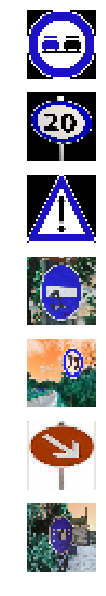

In [13]:
# show/plot the images downloaded from the web.
# images are resized to 32X32
plot_img(len(resized), 1, (10,10), resized, titles=None)

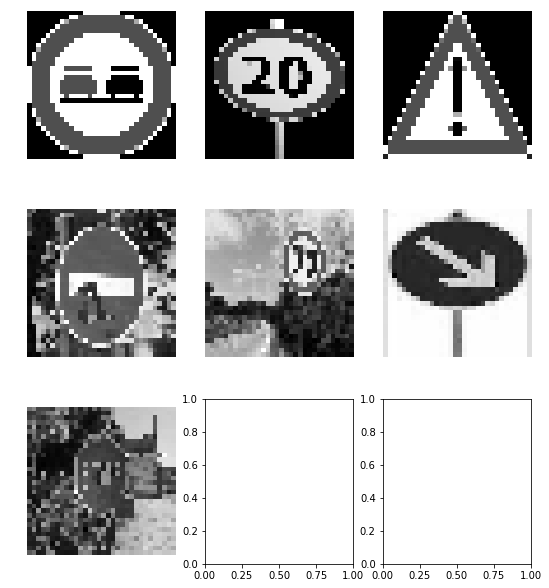

In [14]:
# preprocessing images -> grayscale -> normalize -> reshape
gry_scaled = grayscale(resized)
normalized = normalize(gry_scaled)
# plot/show grayscaled & normalized images
plot_img(3, 3, (10,10), normalized, titles=None, cmap='gray')

**Question 5** Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

**Answer**
The code cells (25-27) above show the 5 images I have chosen from the web. I have pre-processed them using the same pipeline (grayscale -> normalize -> reshape) I used earlier and then displayed them.

Images used are as follows:
1. No Passing (9): This should be easy since its a clear image. What could make it difficult is lack of enough images in the training set of different quality/birghtness levels.
2. 20 Km/h (0): The image has a full board along with the stand/stem that holds the board. Also its a big image scaled down for this test. This could make it difficult to classify.
3. General Caution (18): Should have no issues apart from image size scaling leading to losss in some image context.
4. No entry (17): The image has some markings/drawing on it. Also the image has a well defined background containing more objects/features possibly making it difficult to classify.
5. 70 km/h (4): Its a large sign which is scaled down for this test. Image contains a lot of details/descriptive colorful background information in the picture. The angle also creates some reflection on the image. This could make classification difficult.
6. Keep Right (38): Image is not very clear, has a thicker border. The sign it self is attached to a stand/stem.
7. Stop (14): Unclear image. Has some markings/drawings on the image. Sign is worn out & damanged a bit and the image has a rich backdrop.
    
In general all the images are large versions scaled down for prediction. Some of the images are at different angles, unclear or have markings/drawings on the image. Also most of the signs have additional objects in the image.
If the dataset does not have enough/fair distribution of each class (various qualities, angles, directions..etc) then it may not be able to classify it correctly with 100% accuracy.


### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_web_samples = reshape(normalized)
Y_web_samples = np.array([9, 0, 18, 17, 4,38, 14])
y_pred_web_sample = tf.nn.softmax(LeNet(x))
# print(X_web_samples)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))   
    pred_eval = sess.run(y_pred_web_sample, feed_dict={x: X_web_samples, y: Y_web_samples, keep_prob: KEEP_PROB_TEST})
#     for eval in pred_eval:
#         print(eval)
#         print(eval[np.argmax(eval)])
    print([np.argmax(row) for row in pred_eval])

[9, 1, 18, 17, 12, 42, 25]


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))   
        my_accuracy = evaluate(X_web_samples, Y_web_samples)
        print("Own image set Accuracy = {:.3f}".format(my_accuracy))

Own image set Accuracy = 0.429


**Question 6.** Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set

**Answer**

1. The accuracy of the model in predicting the new traffic signs was 42.9%.
2. This is significantly less than the test set accuracy. I think its expected given that the data-set is small and skewed. If I augment the training set with more generated images for the classes that are not evenly represented; I imagine things would be better. If I generate images by flipping, shifting & applying other image transformations, I would probably get better results overall. That is something I intent to try later.
3. The model predicted the No Passing (9), General Caution (18) & the No Entry images correctly(17).
4. The images are much bigger(scaled down for testing),have markings or portions of the sign damaged and some have extra objects in the image which is confusing the classifier. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [45]:
# populate dictionary of class id to label from csv file.

import csv

id_to_label_dict = {}
def get_sign_names_from_csv():
    with open('signnames.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        for i, row in enumerate(reader):
            if i != 0:
                id_to_label_dict[int(row[0])] = row[1]

get_sign_names_from_csv()
print(id_to_label_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

TopKV2(values=array([[  9.97121036e-01,   2.87888432e-03,   6.88179957e-10,
          6.01615480e-10,   2.19914934e-13],
       [  5.98457277e-01,   2.33777121e-01,   6.20701648e-02,
          6.13735355e-02,   2.31831465e-02],
       [  1.00000000e+00,   2.13335094e-23,   2.26813406e-24,
          4.09593063e-34,   0.00000000e+00],
       [  9.99992728e-01,   6.92632011e-06,   3.27971691e-07,
          5.47216406e-09,   4.56202853e-11],
       [  9.99984503e-01,   1.53331948e-05,   6.03773174e-08,
          3.90941235e-09,   2.79507151e-09],
       [  9.97594893e-01,   2.39571440e-03,   9.38866106e-06,
          1.95332484e-09,   3.26992960e-10],
       [  9.98370826e-01,   1.62679225e-03,   1.93791493e-06,
          1.69836738e-07,   1.30494826e-07]], dtype=float32), indices=array([[ 9, 23, 10,  3, 16],
       [ 1, 40,  7,  0, 17],
       [18, 27, 26, 40,  0],
       [17, 34, 14, 12, 36],
       [12,  1, 40, 11, 39],
       [42, 13, 10,  7, 38],
       [25, 12, 35, 13, 14]], dtype=in

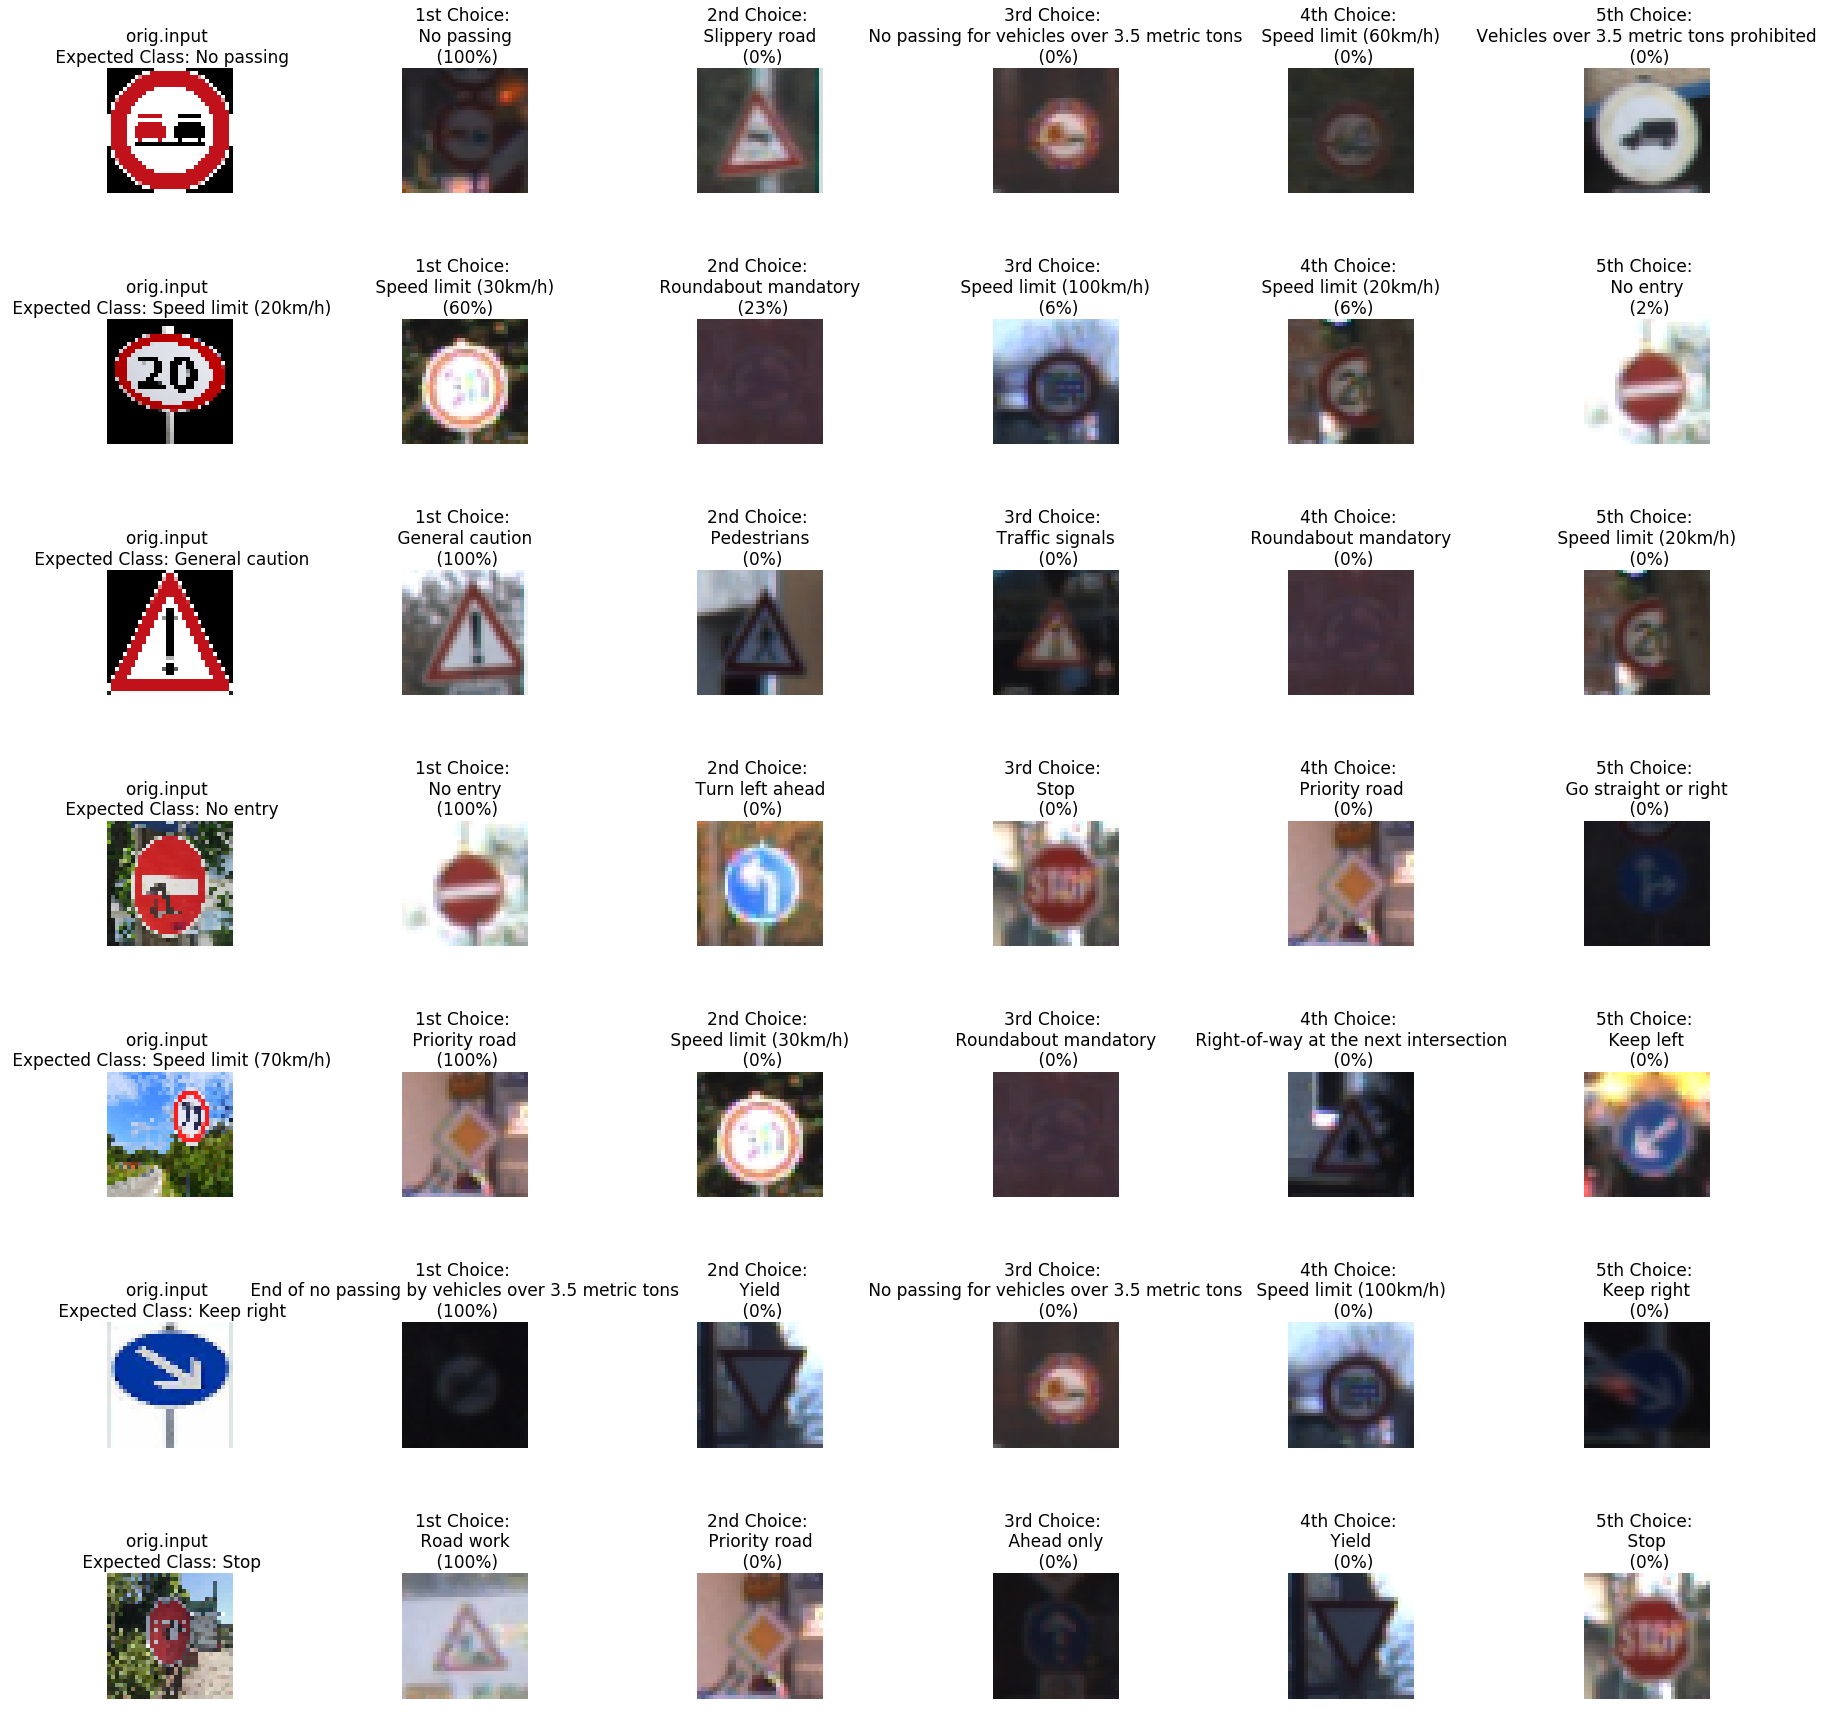

In [61]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = tf.nn.top_k(y_pred_web_sample, k=5)
with tf.Session() as sess:
     saver.restore(sess, tf.train.latest_checkpoint('.'))
     top_k = sess.run(top_k, feed_dict={x: X_web_samples, y: Y_web_samples, keep_prob: KEEP_PROB_TEST})
     print(top_k)

row = len(resized)
col = 6;
fig, axs = plt.subplots(row,col, figsize=(30, 30))
fig.subplots_adjust(hspace = 1.0, wspace=.5)
axs = axs.ravel()

for i, image in enumerate(resized):
    # original image
    axs[col*i].axis('off')
    axs[col*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[col*i].set_title('orig.input \n Expected Class: {}'.format(id_to_label_dict[Y_web_samples[i]]), fontsize = 17)
    
    # Prediction 1
    choice1 = top_k[1][i][0]
    index1 = np.argwhere(y_valid_original == choice1)[0]
    axs[col*i+1].axis('off')
    axs[col*i+1].imshow(X_valid_original[index1].squeeze(), cmap='gray')
    pred_percent1 = 100*top_k[0][i][0]
    axs[col*i+1].set_title('1st Choice: \n {} \n ({:.0f}%)'.format(id_to_label_dict[choice1], pred_percent1), fontsize = 17)

    # Prediction 2
    choice2 = top_k[1][i][1]
    pred_percent2 = 100*top_k[0][i][1]
    index2 = np.argwhere(y_valid_original == choice2)[0]
    axs[col*i+2].axis('off')
    axs[col*i+2].imshow(X_valid_original[index2].squeeze(), cmap='gray')
    axs[col*i+2].set_title('2nd Choice: \n {} \n ({:.0f}%)'.format(id_to_label_dict[choice2], pred_percent2), fontsize = 17)

    # Prediction 3
    choice3 = top_k[1][i][2]
    pred_percent3 = 100*top_k[0][i][2]
    index3 = np.argwhere(y_valid_original == choice3)[0]
    axs[col*i+3].axis('off')
    axs[col*i+3].imshow(X_valid_original[index3].squeeze(), cmap='gray')
    axs[col*i+3].set_title('3rd Choice: \n {} \n ({:.0f}%)'.format(id_to_label_dict[choice3], pred_percent3), fontsize = 17)
    
    # Prediction 4
    choice4 = top_k[1][i][3]
    pred_percent4 = 100*top_k[0][i][3]
    index4 = np.argwhere(y_valid_original == choice4)[0]
    axs[col*i+4].axis('off')
    axs[col*i+4].imshow(X_valid_original[index4].squeeze(), cmap='gray')
    axs[col*i+4].set_title('4th Choice: \n {} \n ({:.0f}%)'.format(id_to_label_dict[choice4], pred_percent4), fontsize = 17)

    # Prediction 5
    choice5 = top_k[1][i][4]
    pred_percent5 = 100*top_k[0][i][4]
    index5 = np.argwhere(y_valid_original == choice5)[0]
    axs[col*i+5].axis('off')
    axs[col*i+5].imshow(X_valid_original[index5].squeeze(), cmap='gray')
    axs[col*i+5].set_title('5th Choice: \n {} \n ({:.0f}%)'.format(id_to_label_dict[choice5], pred_percent5), fontsize = 17)


**Question 7.** Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability.

**Answer**

 1. The model predicts 3 out of the 7 image signs correctly.
 2. Clearly it is not perfect. The top 5 predictions for each image is presented above.
 3. If you go through the results, the expected class label is present in the top 5 predictions for all the images barring the 5th Image (70km/h sign). 3 of them are predicted 100% accurately (1st 3rd, 4th Images). 
 4. May be playing with the hyper parameters might imporve the accuracy. 
 5. I believe some form of preprocessing of the image like contrast adaptive histogram equalization might actually help in improving the prediction as well. Also as mentioned previously, generating more data using image transformations (scaling, flipping, shifting, rotation..) could also be key to improving accuracy.
     

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")